In [1]:
import numpy as np
import pandas as pd
import scipy
import random
from scipy.stats import multivariate_normal
from scipy.sparse import linalg
import matplotlib.pyplot as plt
from matplotlib import cm
from tqdm.notebook import tqdm, trange
import time # to be used in loop iterations
np.random.seed(1234)

## Single-digit neural single layer network trained on the MNIST dataset

I implemented a neural single layer network with symmetric architecture trained on the MNIST dataset that performs single digit architecture and tried to study the asymptotic distribution of network parameters as claimed in the 2019 paper by Sirgiano and Spiliopoulos entitled 'Mean Field Analysis of Neural Networks: A Law of Large Numbers'.

In [2]:
def sigmoid(x):
    if x < 0:
        return np.exp(x)/(1+np.exp(x))
    else:
        return 1/(1+np.exp(-x))
vsigmoid = np.vectorize(sigmoid)   

In [3]:
#standardising dataset
def standardise_mlp(X):
    """
    Args:

    X: numpy array of shape (n_samples, n_features) representing the input data

    Returns:

    Xbar: numpy array of shape (n_samples, n_features) representing the standardized input data
    """
    mu = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std_filled = std.copy()
    std_filled[std==0] = 1.
    Xstd = ((X-mu)/std_filled)
    return Xstd

In [4]:
# Load training data 

#train data
data = pd.read_csv('MNIST_train.csv')

#training set ground truth labels
y_train = np.squeeze(np.array(data[data.columns[0]]))

train_data = data[data.columns[1:]].to_numpy()

#standardise train data
train_data_std = standardise_mlp(train_data)

#test data
test_data = pd.read_csv('MNIST_test.csv')

#test set ground truth labels
y_test = np.array(test_data[test_data.columns[0]])

test_data = test_data[test_data.columns[1:]].to_numpy()

#standardise test data
test_data_std = standardise_mlp(test_data)


x_train = train_data_std
y_train = np.where(y_train == 0,  1, -1)
x_test = test_data_std
y_test = np.where(y_test == 0,  1, -1)

In [5]:
def neural_net(x,w,c):
    """
    Compute the output of a neural network with given weights and coefficients.

    Parameters:
    x (np.ndarray): Input data with shape (n, d).
    w (np.ndarray): Weight matrix with shape (N, d).
    c (np.ndarray): Coefficients of the neural network with shape (1, N).

    Returns:
    np.ndarray: The output of the neural network with shape (1, n).
    """
    n = x.shape[0]
    d = x.shape[1]
    N = w.shape[0]
    return (1/N*c@vsigmoid(w@x.T)).reshape(1,n)

In [ ]:
c, w, params, risk_SGD = train(x_train, y_train, x_test, y_test, N = 10, learning_rate = 1e-3)

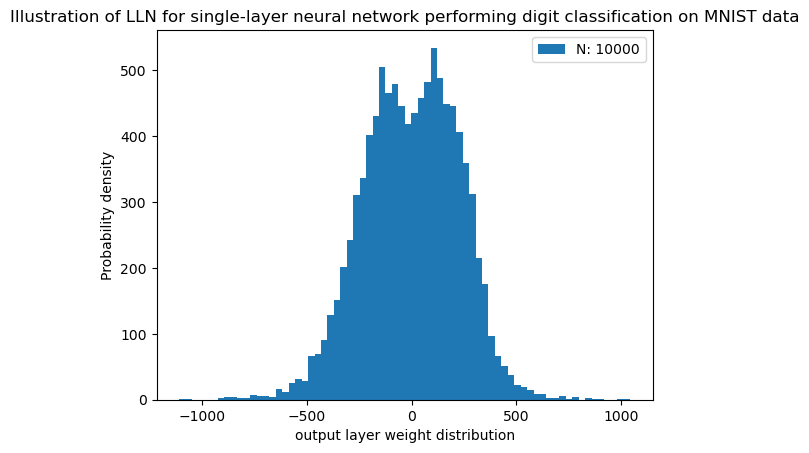

In [43]:
plt.hist(params, label = 'N: 10000', bins = 70)
plt.title('Illustration of LLN for single-layer neural network performing digit classification on MNIST data')
plt.ylabel('Probability density')
plt.xlabel('output layer weight distribution')
plt.legend()